In [13]:
from sklearn import datasets
digits=datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
digits.images.shape

(1797, 8, 8)

In [15]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


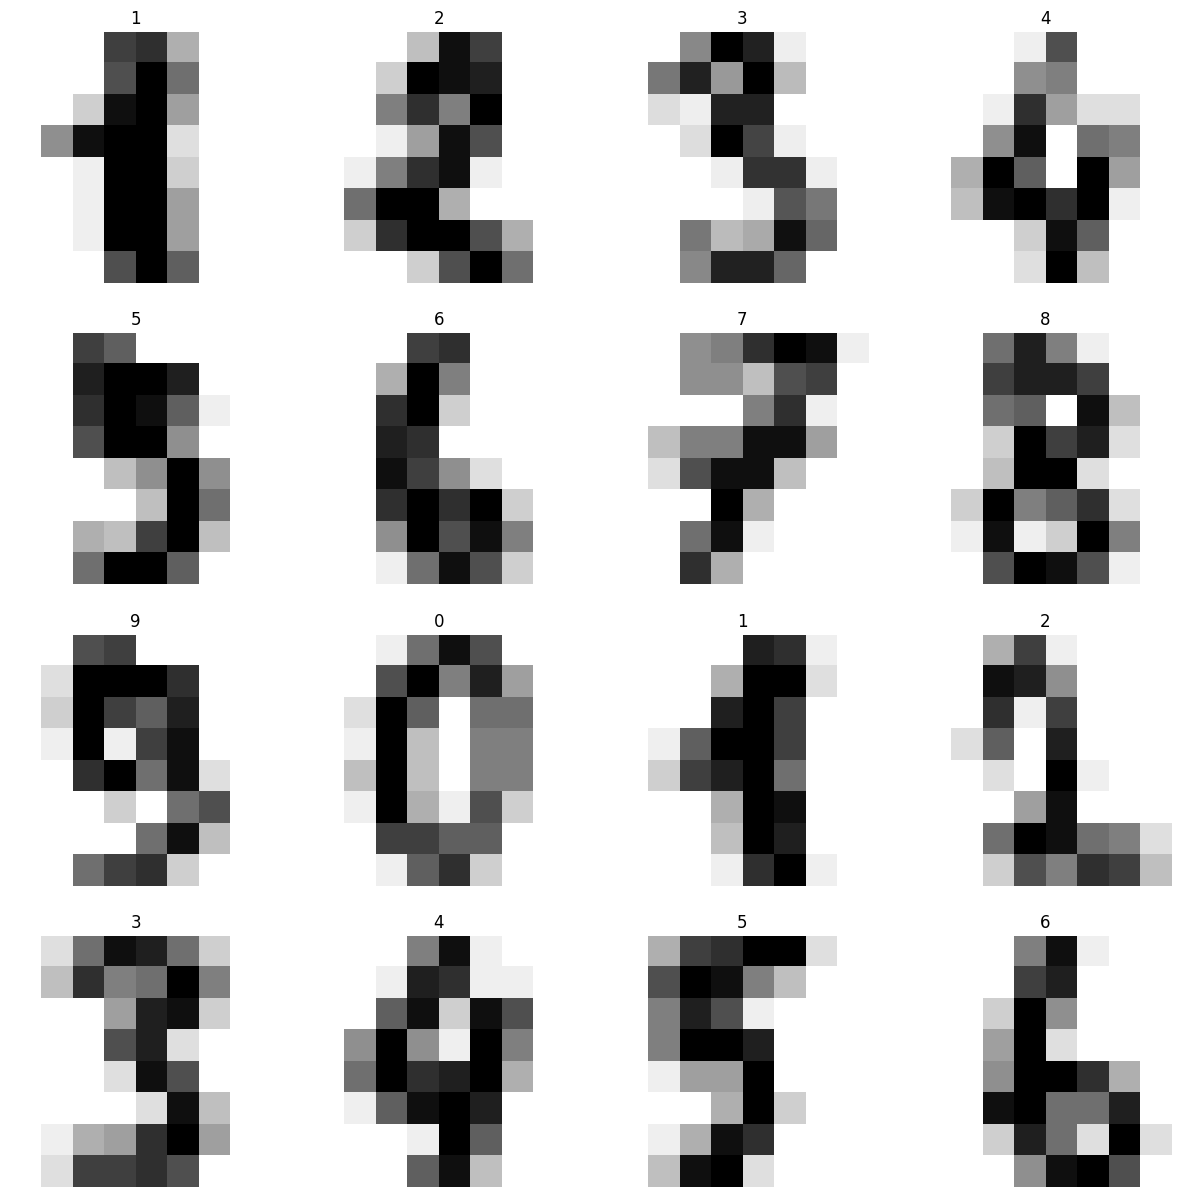

In [16]:
import matplotlib.pyplot as plt

def vis_digit(i):
  plots=16
  fig=plt.figure(figsize=(15,15))
  for j in range(plots):
    plt.subplot(4,4,j+1)
    plt.imshow(digits.images[i+j],cmap='binary')
    plt.title(digits.target[i+j])
    plt.axis('off')
  plt.show()

vis_digit(1)

In [17]:
y=digits.target
x=digits.images.reshape((len(digits.images),-1))
x.shape

(1797, 64)

In [19]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [20]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [23]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(15,),
                  activation='logistic',
                  alpha=1e-4,solver='sgd',
                  tol=1e-4,random_state=1,
                  learning_rate_init=.1,
                  verbose=True)
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.19270466
Iteration 2, loss = 1.78106526
Iteration 3, loss = 1.38270666
Iteration 4, loss = 1.02071875
Iteration 5, loss = 0.75234698
Iteration 6, loss = 0.56958624
Iteration 7, loss = 0.45023197
Iteration 8, loss = 0.37222874
Iteration 9, loss = 0.32180224
Iteration 10, loss = 0.26857837
Iteration 11, loss = 0.25223978
Iteration 12, loss = 0.22529138
Iteration 13, loss = 0.19961852
Iteration 14, loss = 0.17311614
Iteration 15, loss = 0.16514902
Iteration 16, loss = 0.15831433
Iteration 17, loss = 0.14430489
Iteration 18, loss = 0.13039890
Iteration 19, loss = 0.12031514
Iteration 20, loss = 0.11186604
Iteration 21, loss = 0.11748450
Iteration 22, loss = 0.10035982
Iteration 23, loss = 0.10020162
Iteration 24, loss = 0.09258365
Iteration 25, loss = 0.09054224
Iteration 26, loss = 0.08192468
Iteration 27, loss = 0.07763574
Iteration 28, loss = 0.07453755
Iteration 29, loss = 0.07157245
Iteration 30, loss = 0.06975163
Iteration 31, loss = 0.06844636
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

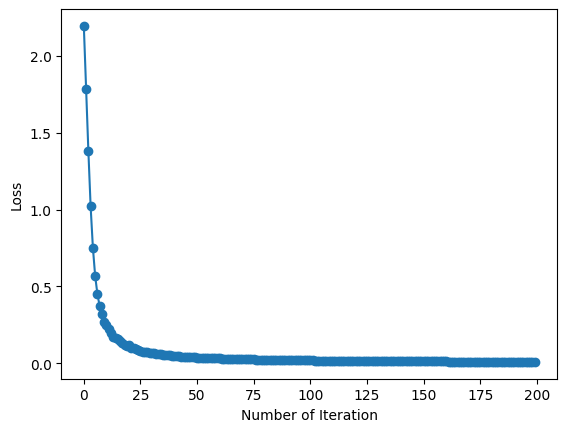

In [25]:
fig,axes=plt.subplots(1,1)
axes.plot(mlp.loss_curve_,'o-')
axes.set_xlabel('Number of Iteration')
axes.set_ylabel('Loss')
plt.show()

In [29]:
model=mlp.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model)

0.9481481481481482